In [71]:
# This page contains the training dataset for this competition. The training dataset contains restaurant reviews and ratings from Wongnai. You are provided with text reviews (mostly in Thai) and ratings (there are only 5 classes ranging from 1 to 5 stars).

# File descriptions
# w_review_train.csv - the training set
# test_file.csv - the test set (without ratings, only text reviews are provided)
# sample_submission.csv - a sample submission file in the correct format

# Data fields (for training set)
# first column - text review (input)
# second column - rating (label)

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Explore Training Data

In [73]:
tr = pd.read_csv("w_review_train.csv", sep=";", names = ["review", "label"])

In [74]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
review    40000 non-null object
label     40000 non-null int64
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [75]:
tr.head(10)

,review,label
0,ร้านอาหารใหญ่มากกกกกกก \nเลี้ยวเข้ามาเจอห้องน้...,3
1,อาหารที่นี่เป็นอาหารจีนแคะที่หากินยากในบ้านเรา...,4
2,ปอเปี๊ยะสด ทุกวันนี้รู้สึกว่าหากินยาก (ร้านที่...,3
3,รัานคัพเค้กในเมืองไทยมีไม่มาก หลายๆคนอาจจะสงสั...,5
4,อร่อย!!! เดินผ่านDigital gatewayทุกวัน ไม่ยักร...,5
5,ร้านข้าวต้มกระดูกหมู ปากซอยพัฒนาการ 57 เป็นอีก...,4
6,วันนี้ได้มีโอกาสไปนั่งซดกาแฟที่ร้านวาวี แถวๆอา...,4
7,สารภาพว่าไม่เคยคิดจะไปต่อคิวซื้อมากินเองครับ บ...,3
8,เมื่อวันก่อนไปเดินเล่น แบบชิวๆๆ ที่สยามสแควร์แ...,5
9,วันก่อนไปเดินสยาม หลังจากห่างหายไป ประมาณ 6 เด...,5


In [76]:
tr.describe()

,label
count,40000.000000
mean,3.742325
std,0.828098
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [77]:
tr["label"].value_counts()

4    18770
3    12171
5     6799
2     1845
1      415
Name: label, dtype: int64

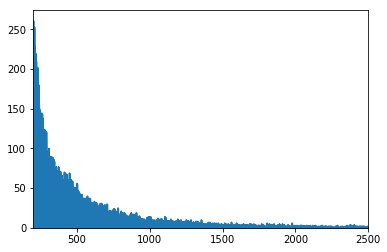

In [143]:
tr["review"].str.len()[tr["review"].str.len()<2500].value_counts().sort_index().plot.area()
plt.show()

In [111]:
tr[tr["review"].str.len()==tr["review"].str.len().min()].iloc[0]["review"]

'ร้านอาหารเล็ก ๆ แต่ของคุณภาพดี อยู่ใกล้ปากเกร็ด มีเมนูหลากหลาย อาทิ ข้าวผัดปู (เนื้อปูเยอะอย่างไม่น่าเชื่อ), เชิงปลากรายทอด, ทอดมันปลากราย, ปลาเนื้ออ่อนทอดกระเทียม, กุ้งแม่น้ำเผา และ ก้ามกุ้งผัดคะน้า '

In [100]:
tr[tr["review"].str.len()==tr["review"].str.len().max()].iloc[0]["review"]

'สำหรับวันนี้ก็จะพาไปกินอาหารอาเซียนกันที่รร.เจ้าพระยาปาร์ค รัชดาภิเษกกันบ้างนะคะ โดยการไปครั้งนี้ก็เป็นการชวนจากคุณอ้นเจ้าเดิมเช่นเคยค่ะ (งานชุกจริงๆ พ่อคุณ) สำหรับการไปวันนั้นเราเอารถส่วนตัวไปค่ะ รถติดมากถึงมากที่สุด กว่าจะไปถึงก็หกโมงครึ่ง (ตามนัดคือหกโมง) ค่ะ พิกัดก็ถ้ามาจากทางพระรามเก้า ก็เลยแยกห้วยขวางไปอีกนะคะ จะอยู่ทางซ้ายมือค่ะ (ใช้กูเกิ้ลแมพนำทางเช่นเคยฮ่ะอิชั้น)\nที่จอดรถจะมีทั้งลานจอดที่อยู่ระหว่างตัวตึกโรงแรมกับตัวอาคารธาราเทพ ที่อยู่ตรงกันข้ามกับตัวตึกห้องพักเลยค่ะ จะเป็นตัวตึกที่มีห้องจัดเลี้ยงและห้องอาหารต่างๆ ด้วยน่ะนะคะ\n\nหันหลังให้ตึกรร. หันหน้าเข้าอาคารธาราเทพ ห้องอัลธาราอยู่ทางซ้ายมือ ส่วนห้องอาหารธารทิพย์สำหรับบุฟเฟท์ข้าวต้ม จะอยู่ทางขวามือค่ะ (เราเคยกินเมื่อก่อนหน้านี้น้านนานมาแล้ว น่าจะสิบกว่าปีเกือบยี่สิบปีได้ เหมือนไม่ใช่ตรงนี้นะคะ)\n\nลักษณะของห้องอาหารจะเป็นกระจกล้อมทางด้านหน้าตามภาพนะคะ ทำให้แม้จำนวนโต๊ะไม่เยอะ พื้นที่ไม่มาก แต่ก็ไม่ได้รู้สึกอึดอัดแต่อย่างใดฮับ และจะเห็นสัญลักษณ์ฮาลาล ซึ่งแสดงว่าห้องอาหารนี้เป็นห้องอาหารฮาลาลสำหรับผู้ที่นับถือศาสนาอิสลามนะ

# Explore Test Data

In [78]:
ts = pd.read_csv("test_file.csv", sep=";")

In [79]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6203 entries, 0 to 6202
Data columns (total 2 columns):
reviewID    6203 non-null int64
review      6203 non-null object
dtypes: int64(1), object(1)
memory usage: 97.0+ KB


In [80]:
ts.head(10)

,reviewID,review
0,1,ร้านนี้จะอยู่เส้นสันกำแพง-แม่ออน เลยแยกบ่...
1,2,สั่งไป2 เมนู คือมัชฉะลาเต้ร้อน กับ ไอศครีมชาเข...
2,3,ครัววงเดือน \n\nหิวดึกๆ ตระเวนหาร้านทาน มาเจอ...
3,4,จะว่าเป็นเจ้าประจำก็คงไม่ผิด แต่ก็ไม่กล้า...
4,5,ถ้าคิดถึงสลัดผมคิดถึงร้านนี้เป็นร้านแรกๆเลยครั...
5,6,กระบี่ก็ต้องไม่พลาด ร้านนี้ค่ะ ร้านปูดำ ส่วนอา...
6,7,ร้านดัง ของหวานอร่อยที่สุดก็คงต้องยกให้ afte...
7,8,อาหารหลากหลายไทย จีน ฝรั่ง ชาบูก็มา ของหวานมีฮ...
8,9,เป็นร้านอาหารเพื่อสุขภาพที่รสชาติดี ทานแล้วไม่...
9,10,ดีใจที่จุดพักรถมอร์เตอร์เวย์ขาเข้า มีร้านอาหาร...


In [88]:
tr["review"].str.len().describe()

count    40000.000000
mean       540.371700
std        532.988348
min        200.000000
25%        255.000000
50%        371.000000
75%        609.000000
max      20557.000000
Name: review, dtype: float64

# Explore Sample Submission

In [81]:
ss = pd.read_csv("sample_submission.csv")

In [82]:
ss.head(10)

,reviewID,rating
0,1,4
1,2,3
2,3,3
3,4,4
